# 2022 NZMSA Data Science Submission.

In [8]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [103]:
dataset = pd.read_csv("weather-data.csv")
 # Show the first five results.
dataset.info()

dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [104]:
#stats for temperature
mean1 = dataset['tmpc'].mean()
print('Mean temperature: ' + str(mean1) + " degrees Celsius.")

std1 = dataset['tmpc'].std()
print('Standard deviation of temperature: ' + str(std1)) 

quant90 = dataset.tmpc.quantile(0.9)
print('Temperature in the 90th percentile: ' + str(quant90) + " degrees Celcius.")

quant10 = dataset.tmpc.quantile(0.1)
print('Temperature in the 10th percentile: ' + str(quant10) + " degrees Celcius.")

#stats for dataset
dataset.describe()



Mean temperature: 15.81150292251008 degrees Celsius.
Standard deviation of temperature: 4.235196864334494
Temperature in the 90th percentile: 21.0 degrees Celcius.
Temperature in the 10th percentile: 11.0 degrees Celcius.


,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


Correlation Plot

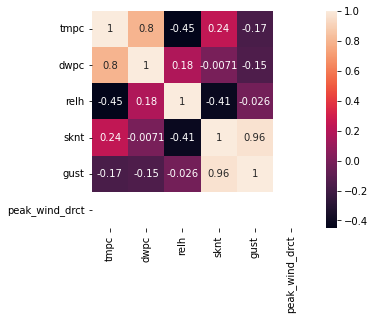

In [105]:
corrMatrix = dataset.corr()
sns.heatmap(corrMatrix, annot=True, square = True)
plt.show()

There seems to be a strong correlation between temperature and dew point (0.8) and between sknt and gust (0.96). 

Average Yearly Temperature Graphed Over Time:

   year   avg_temp
0  2015  15.490395
1  2016  16.065568
2  2017  15.807846
3  2018  15.874957
4  2019  15.850617
5  2020  15.776539


Text(0, 0.5, 'Avg. Temp. in Celsius')

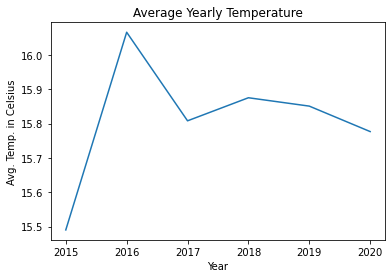

In [106]:
# convert valid to datetime format
dataset['valid'] = pd.to_datetime(dataset.valid)

# group dataset by year, then calculate avg temp for the year
yearly_avg = dataset.groupby(dataset.valid.dt.year)['tmpc'].mean().reset_index(name='tmp')

# rename columns
yearly_avg.columns = ["year", "avg_temp"]

print(yearly_avg)

# plot avg yearly temp over time
ann_temp = sns.lineplot(x = 'year', y = 'avg_temp',data = yearly_avg)
ann_temp.set_title("Average Yearly Temperature")
ann_temp.set_xlabel("Year")
ann_temp.set_ylabel("Avg. Temp. in Celsius")




In [116]:

#Get monthly average for the year 2015
dataset = pd.read_csv("weather-data.csv")
dataset.head()

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [108]:
# convert 'valid' column to datetime format
dataset['valid'] = pd.to_datetime(dataset.valid)
dataset.head()



,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30:00,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30:00,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00:00,21.0,12.0,56.38,16.0,NaN,NaN


In [117]:
# select for the year 2015
dataset_16 = dataset[pd.to_datetime(dataset.index).year == 2016]

dataset_16.head()

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct


,month,avg_temp
0,1,20.367562
1,2,20.582197
2,3,19.329858
3,4,16.651467
4,5,14.419359


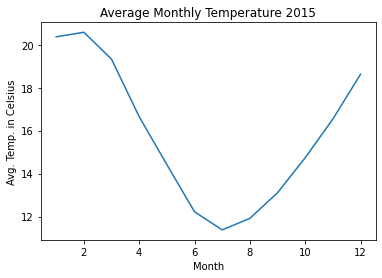

In [96]:

#Get monthly average for the year 2015
dataset = pd.read_csv("weather-data.csv")

# convert valid to datetime format
dataset['valid'] = pd.to_datetime(dataset.valid)

# select for the year 2015
dataset[pd.to_datetime(dataset.index).year == 2015]


# group dataset by year, then calculate avg temp for the year
month_avg_2015 = dataset.groupby(dataset.valid.dt.month)['tmpc'].mean().reset_index(name='tmp')


# rename columns
month_avg_2015.columns = ["month", "avg_temp"]



# plot graph over time 
ann_temp = sns.lineplot(x = 'month', y = 'avg_temp',data = month_avg_2015)
ann_temp.set_title("Average Monthly Temperature 2015")
ann_temp.set_xlabel("Month")
ann_temp.set_ylabel("Avg. Temp. in Celsius")

month_avg_2015.head()


   year   avg_dwpc
0  2015  11.651090
1  2016  12.424081
2  2017  12.182056
3  2018  12.498052
4  2019  12.157558
5  2020  11.777454


Text(0, 0.5, 'Avg. Dew Point')

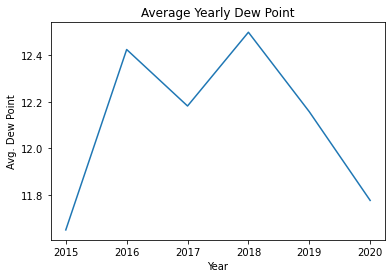

In [58]:
# convert valid to datetime format
dataset['valid'] = pd.to_datetime(dataset.valid)

# group dataset by year, then calculate avg temp for the year
yearly_avg = dataset.groupby(dataset.valid.dt.year)['dwpc'].mean().reset_index(name='dwpc')

# rename columns
yearly_avg.columns = ["year", "avg_dwpc"]

print(yearly_avg)

# plot avg yearly temp over time
ann_temp = sns.lineplot(x = 'year', y = 'avg_dwpc',data = yearly_avg)
ann_temp.set_title("Average Yearly Dew Point")
ann_temp.set_xlabel("Year")
ann_temp.set_ylabel("Avg. Dew Point")

# Data Processing

In [46]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

In [131]:
#drop station, peak_wind_drct, and gust because the station is the same and there are too many missing PWD and gust values
weather_df = pd.read_csv("weather-data.csv")
weather_df['valid'] = pd.to_datetime(weather_df.valid)
weather_df.head() # Show the first five results.

#dataset.drop(dataset.columns[[0, 6, 7]], inplace = True) <- This showed me that "station" is actually " station" 
weather_df.drop(columns=[' station', 'gust', 'peak_wind_drct'], inplace=True)
#dataset.head()
#dataset.info()

#drop na values
weather_df.dropna(axis=0, inplace= True)
weather_df.info()
weather_df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   valid   103584 non-null  datetime64[ns]
 1   tmpc    103584 non-null  float64       
 2   dwpc    103584 non-null  float64       
 3   relh    103584 non-null  float64       
 4   sknt    103584 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 4.7 MB


,valid,tmpc,dwpc,relh,sknt
0,2015-01-01 00:00:00,21.0,11.0,52.77,15.0
1,2015-01-01 00:30:00,21.0,10.0,49.37,16.0
2,2015-01-01 01:00:00,21.0,12.0,56.38,16.0
3,2015-01-01 01:30:00,21.0,13.0,60.21,16.0
4,2015-01-01 02:00:00,21.0,12.0,56.38,16.0


# Data Modelling

In [132]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

# Define my target: temperature
y = weather_df.tmpc 

# Define my x-values, or features
weather_features = ['dwpc', 'relh', 'sknt', 'valid']
X = weather_df[weather_features]
X.describe()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Training and validation sets 
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

# Create Random Forest Model
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
val_predictions = forest_model.predict(val_X)

#Evaluating with MAE and R2
print(mean_absolute_error(val_predictions,val_y))

forest_model.score(val_X, val_y)


TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[datetime64]'>)

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.